Data science Framework 설명
1: 문제 정의
requirement, solution, design, technology는 문제 정의 다음에 생각해봐야 하는데, 문제 정의를 건너뛰고 이것들에 먼저 집중하지 않도록 주의
2: 데이터 모으기
대회에서 주어진 dataset이 이미 다양한 format으로 존재하고 있었을 수도 있다(데이터톤에서도 실제로 그랬다)
3: Data wrangling
한마디로 표현하면 전처리이다. 구체적으로는 data extraction(웹에서 스크랩하는 것 등), data cleaning(이상치, 결측치 정리) 같은 것들을 포함한다
4: Exploratory analysis
GIGO(garbage-in, garbage-out)이라는 말을 명심하면서 dataset의 potential problem, pattern, classification, correlation, comparison을 전처리 이후에도 추가로 생각해주어야 한다.
5: Model data
개요: 알고리즘은 만능이 아니고, 그저 도구이기 때문에 우리가 dataset과 expected result에 따라 어떤 알고리즘이 좋을지 선택해야 한다.
Maching learning algoritm 종류는 크게 보면 4가지 -> classification, regression, clustering, dimensionality reduction  / 이 예제에서는 classification, regression 다룬다
어떤 algorithm이 가장 좋을지를 문제마다 항상 고민하게 되는데, NFLT를 명심해야 한다.-> 세상에는 모든 dataset과 모든 상황에 알맞는 super algorithm이 존재하지 않기 때문에 multiple MLA를 시도해보고, 그것들을 tuning해보는 등등 다양한 시도를 해야 한다. 초보자들은 tree, bagging, random forest, boosting, SVC 들을 시도해보는 것을 권한다
6: Data model 적용 후 테스트
model을 data의 subset으로 train하고 test해야 한다. 이 과정에서 model의 overfit, generalize, underfit을 판단할 수 있어야 하고, model을 수정해서 최선의 결과를 내려고 노력하면 된다.
7: Optimize and strategize
model 수정만으로 만족할 만한 결과가 나오지 않았다면 1번부터 6번까지 모든 과정을 검토하면서 이번에는 preprocessing을 더 꼼꼼하게 하고, 6번 과정을 진행해야겠다 이런 식으로 피드백하면 된다

1: kaggle에서 알려준다
2: 캐글에서 데이터셋을 준다

In [1]:
#3.1 기본 library 호출
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#원래 코드에는 없는 건데 내가 보기 편하려고 넣음)
pd.set_option('display.max_seq_items', None)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]
pandas version: 2.0.3
matplotlib version: 3.8.2
NumPy version: 1.25.0
SciPy version: 1.11.4
IPython version: 8.14.0
scikit-learn version: 1.2.2
-------------------------


In [2]:
#3.11 modeling library 호출
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
#3.2 meet and Greet data
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

#train과 test data를 동시에 수정하기 위해 cleaner라는 리스트 만들었다
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

# Duplicates  #아직 왜 했는지 모름
print(f'Duplicates in train set: {data_raw.duplicated().sum()}, ({np.round(100*data_raw.duplicated().sum()/len(data_raw),1)}%)')
print('')
print(f'Duplicates in test set: {data_val.duplicated().sum()}, ({np.round(100*data_val.duplicated().sum()/len(data_val),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [4]:
#3.21 Data cleaning의 4가지 단계: correcting, completing, creating, converting
#결측치 파악
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [5]:
#column마다 고유 값의 개수
data_raw.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [6]:
#features 구분하기
# Expenditure features(금전적)
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Categorical features(범주형 데이터)
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Qualitative features(수치로 측정 불가능한데 범주형은 아닌 애들)
qual_feats=['PassengerId', 'Cabin' ,'Name']

Text(0.5, 1.0, 'Age group distribution')

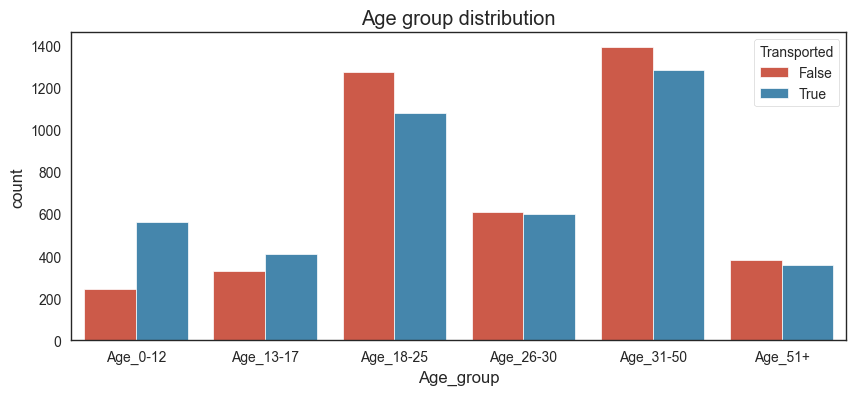

In [7]:
#3.22 clean data
#for문이 나와서 뭔가 거창해 보이는데, 그냥 train data, test data를 동시에 바꾸기 위한 것
#어떻게 바꾸었는지를 설명하자면, 맨 위에서 Age_group column을 만들고 loc문을 써서 age 조건에 따라 값을 집어넣고 있다
for dataset in data_cleaner: 
    dataset['Age_group']=np.nan
    dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'
    dataset.loc[(dataset['Age']>12) & (dataset['Age']<18),'Age_group']='Age_13-17'
    dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25),'Age_group']='Age_18-25'
    dataset.loc[(dataset['Age']>25) & (dataset['Age']<=30),'Age_group']='Age_26-30'
    dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age_group']='Age_31-50'
    dataset.loc[dataset['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features(test data만 시각화)
plt.figure(figsize=(10,4))
g=sns.countplot(data=data1, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

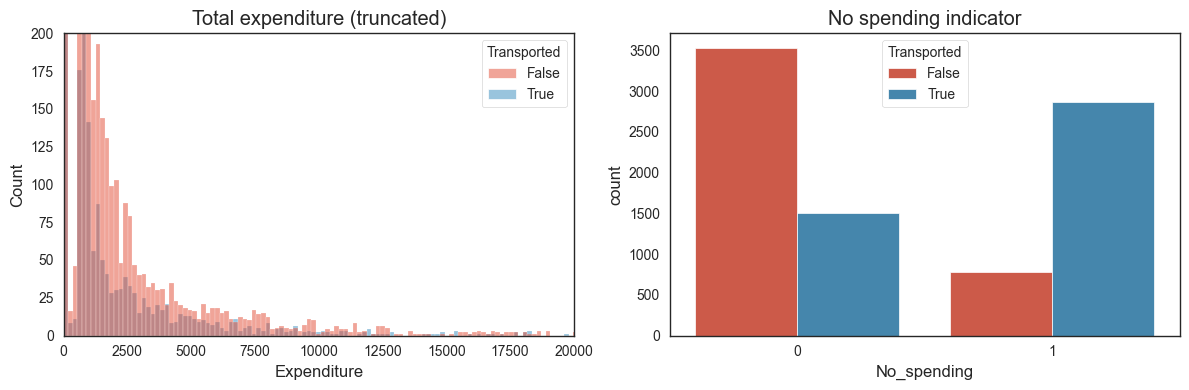

In [8]:
#금전적 데이터는 전부 더해서 expenditure라는 새로운 column에 저장, 지출이 0이라면 No_spending에서 1로 따로 표시
for dataset in data_cleaner: 
    dataset['Expenditure']=dataset[exp_feats].sum(axis=1)
    dataset['No_spending']=(dataset['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=data1, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

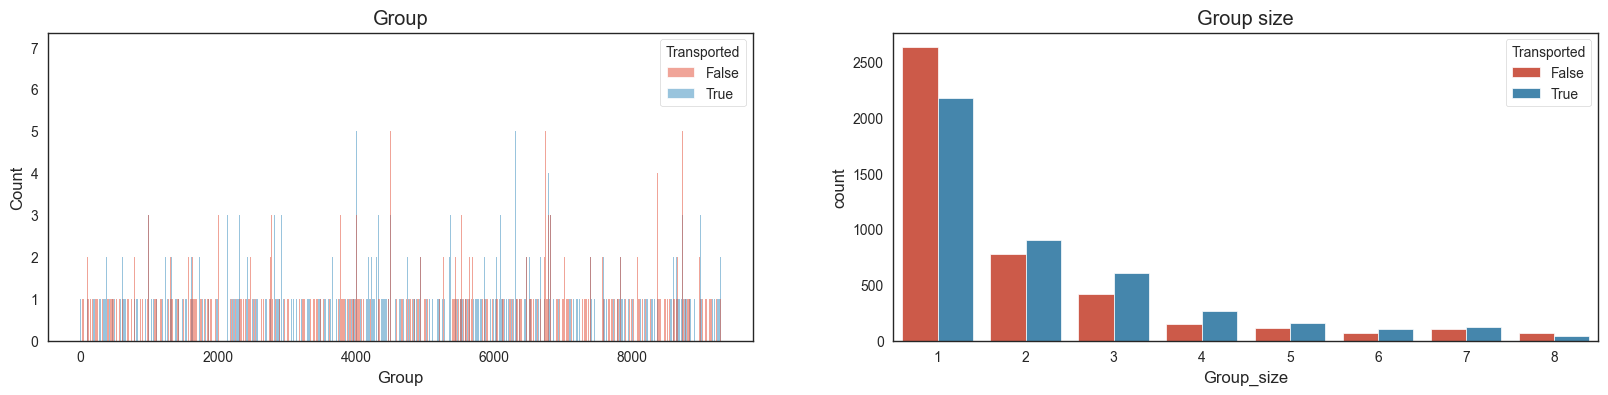

In [9]:
#첫 줄은 passengerID의 앞부분만 group에 저장
#2번째 줄은 앞부분이 똑같은 승객들이 몇 명인지 세서 그 크기를 size에 저장
for dataset in data_cleaner: 
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['Group_size']=dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=data1, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

(0.0, 3000.0)

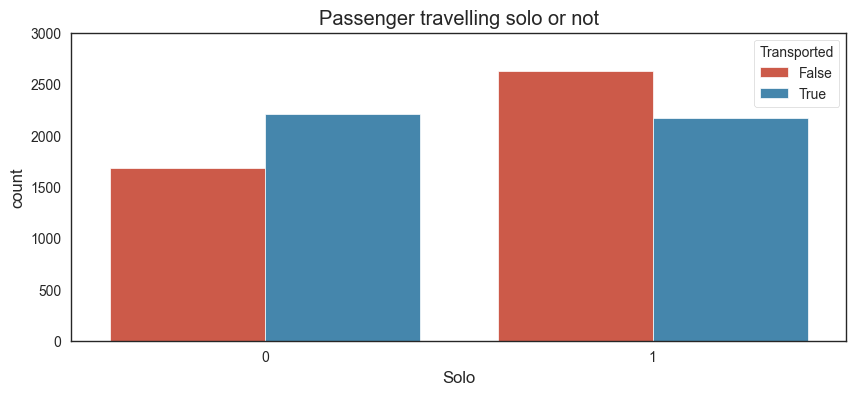

In [10]:
#막상 group으로 데이터를 시각화해보니까 cardinality가 6217으로 너무 크기 때문에
#one-hot encoding이 불가능하다
#그래서 solo column을 새로 만들어서 단순하게 group size가 1인 애들이랑, 1보다 큰 애들로 쪼개보기
for dataset in data_cleaner: 
    dataset['Solo']=(dataset['Group_size']==1).astype(int)
    

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

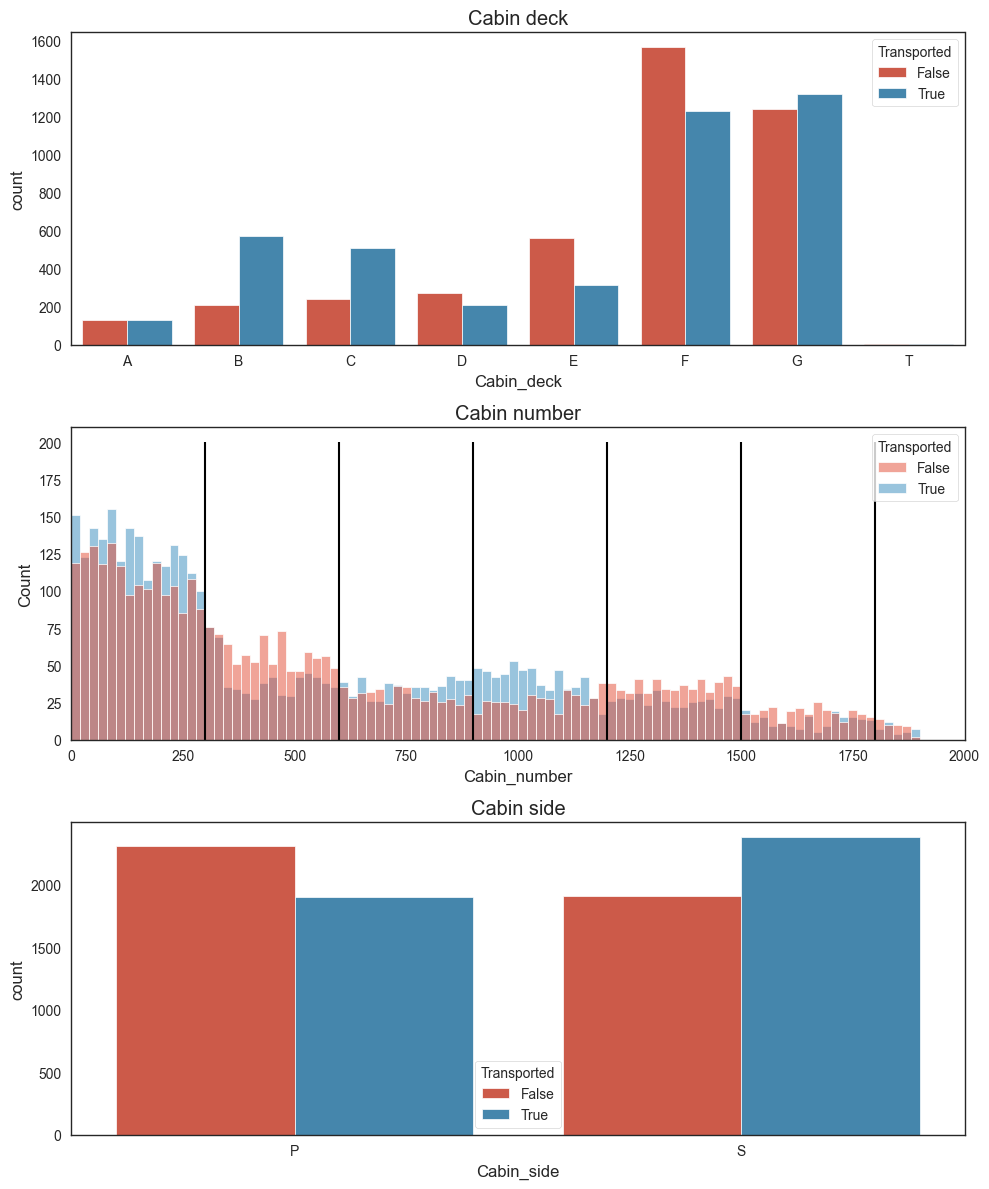

In [11]:
#1등은 일단 split에 주목해서 outlier로 결측치를 채우고, 
#deck, number, side라는 column을 만든 다음에 이상치를 nan으로 채웠다
for dataset in data_cleaner: 
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)
    # New features
    dataset['Cabin_deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0])
    dataset['Cabin_number'] = dataset['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    dataset['Cabin_side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2])
    
    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
    dataset.loc[dataset['Cabin_number']==9999, 'Cabin_number']=np.nan
    dataset.loc[dataset['Cabin_side']=='Z', 'Cabin_side']=np.nan
    
    # Drop Cabin (we don't need it anymore)
    dataset.drop('Cabin', axis=1, inplace=True)


# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=data1, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=data1, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')  #vline: 수직선 긋기(영역 구분 느낌)
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=data1, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

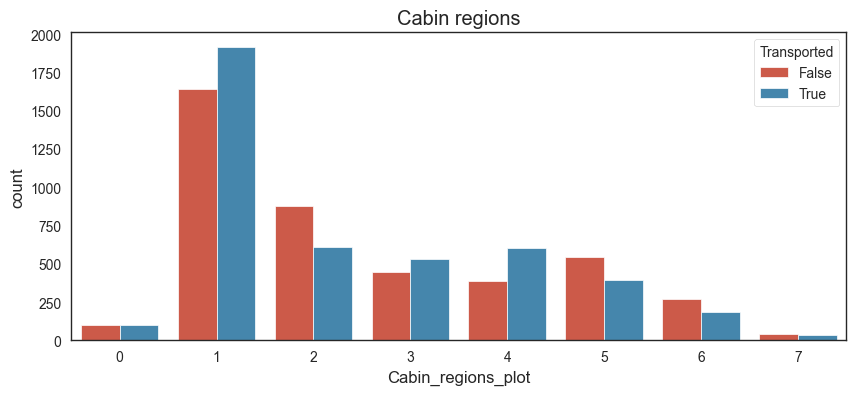

In [12]:
#cabin_number에 따라 region을 쪼개는데, 이게 one-hot-encoding을 할 때 필요한듯
for dataset in data_cleaner:
    # New features - training set
    dataset['Cabin_region1']=(dataset['Cabin_number']<300).astype(int)   # one-hot encoding
    dataset['Cabin_region2']=((dataset['Cabin_number']>=300) & (dataset['Cabin_number']<600)).astype(int)
    dataset['Cabin_region3']=((dataset['Cabin_number']>=600) & (dataset['Cabin_number']<900)).astype(int)
    dataset['Cabin_region4']=((dataset['Cabin_number']>=900) & (dataset['Cabin_number']<1200)).astype(int)
    dataset['Cabin_region5']=((dataset['Cabin_number']>=1200) & (dataset['Cabin_number']<1500)).astype(int)
    dataset['Cabin_region6']=((dataset['Cabin_number']>=1500) & (dataset['Cabin_number']<1800)).astype(int)
    dataset['Cabin_region7']=(dataset['Cabin_number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
data1['Cabin_regions_plot']=(data1['Cabin_region1']+2*data1['Cabin_region2']+3*data1['Cabin_region3']+4*data1['Cabin_region4']+5*data1['Cabin_region5']+6*data1['Cabin_region6']+7*data1['Cabin_region7']).astype(int)
sns.countplot(data=data1, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
data1.drop('Cabin_regions_plot', axis=1, inplace=True)

Text(0.5, 1.0, 'Family size')

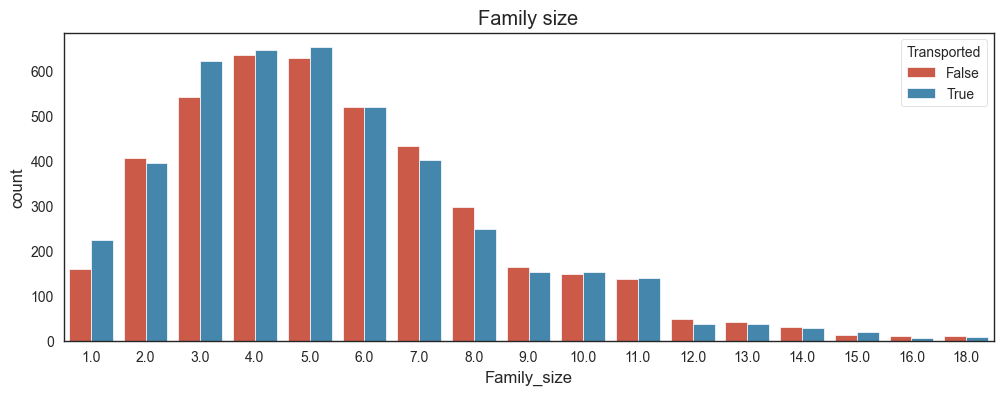

In [13]:
#name 결측치는 unknown 2개로 채워서 이름과 성을 모두 표현
#surname을 새로 만들어서 family_size까지 유도
for dataset in data_cleaner:
    # Calculate family size from last name.
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Name'].fillna('Unknown Unknown', inplace=True)
    # New feature - Surname
    dataset['Surname']=dataset['Name'].str.split().str[-1]
    # New feature - Family size
    dataset['Family_size']=dataset['Surname'].map(lambda x: dataset['Surname'].value_counts()[x])
    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Surname']=='Unknown','Surname']=np.nan
    dataset.loc[dataset['Family_size']>100,'Family_size']=np.nan
    # Drop name (we don't need it anymore)
    dataset.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=data1, x='Family_size', hue='Transported')
plt.title('Family size')

              Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Age_group                179                2.06
Cabin_deck               199                2.29
Cabin_number             199                2.29
Cabin_side               199                2.29
Surname                  200                2.30
Family_size              200                2.30 

              Number_missing  Percentage_missing
HomePlanet                87                2.03
CryoSleep                 93                2.17
Destination       

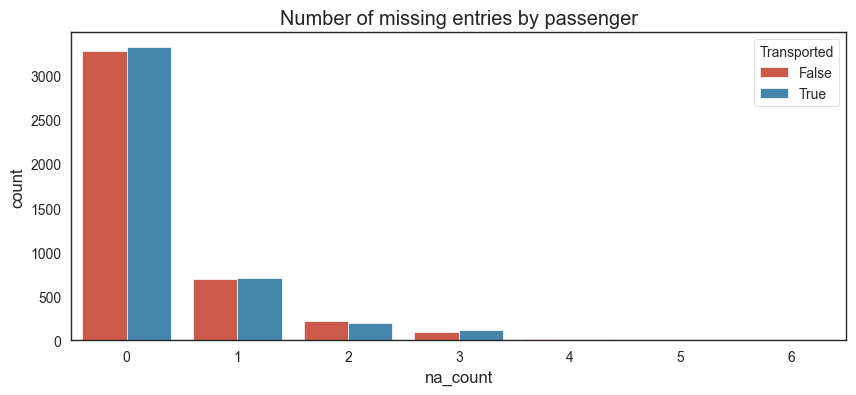

In [14]:
#transported가 boolean이니까 int로 바꿔주기
data1['Transported'].astype(int)
#column별로 결측치 개수 세고, 퍼센트도 정리
for dataset in data_cleaner:
    # Columns with missing values
    na_cols=dataset.columns[dataset.isna().any()].tolist()
    mv=pd.DataFrame(dataset[na_cols].isna().sum(), columns=['Number_missing'])
    mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(dataset),2)
    print(mv, '\n')

# Countplot of number of missing values by passenger
data1['na_count']=data1.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
data1.drop('na_count', axis=1, inplace=True)

#1등은 여기서 data의 2%정도만 결측치이고, 25%의 승객이 최소 1개의 결측치를 가지고 있다는 것에서 
#insight를 얻었다 -> 대부분의 결측값이 분리되어 있으니 단순히 행을 삭제하는 것이 아니라
#유일하게 결측치가 없는 passengerID와 다른 feature 사이 관계에 따라 결측치를 채우자

In [41]:
#test가 이런 식으로 나오는 원리 설명
#groupby로 group, homeplanet을 묶는다 -> ['HomePlanet'].size(): homeplanet 객체의 크기 반환
#->unstack: homeplanet객체의 행 구성 요소(Earth, Europa, Mars)를 열 구성 요소로 변경(가로로 길게)
test1 = data1.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack()
test1

HomePlanet,Earth,Europa,Mars
Group,,,
1,NaN,1.0,NaN
2,1.0,NaN,NaN
3,NaN,2.0,NaN
4,1.0,NaN,NaN
5,1.0,NaN,NaN
...,...,...,...
9275,NaN,3.0,NaN
9276,NaN,1.0,NaN
9278,1.0,NaN,NaN


In [43]:
#data1[data1['HomePlanet'].isna()]: homeplanet이 na인 행만 추출
#->(data1[data1['HomePlanet'].isna()]['Group']) : homeplanet이 na인 애들의 group(group은 앞자리가 동일한 애들->가족, 연인들로 추정)
#->.isin(test1.index) : 그 group들 중에서 test1의 index와 일치하는 애들만 남기기(test1.index가 1~9280까지 다 있는 게 아니라서 의미 있음)
#-> .index: 그런 데이터들의 index만 추출
t1 = data1[data1['HomePlanet'].isna()][(data1[data1['HomePlanet'].isna()]['Group']).isin(test1.index)].index
t1

Index([  59,  113,  405,  407,  438,  471,  501,  505,  524,  568,  637,  737,
        848,  920,  962,  993,  999, 1024, 1757, 1892, 1916, 2227, 2246, 2322,
       2324, 2425, 2544, 2617, 2638, 2642, 2715, 2898, 3119, 3192, 3277, 3433,
       3635, 3769, 3891, 3940, 3951, 4097, 4343, 4374, 4535, 4632, 4702, 4770,
       5024, 5079, 5081, 5112, 5316, 5438, 5624, 5689, 5699, 5904, 5906, 5953,
       6011, 6054, 6056, 6154, 6169, 6205, 6267, 6450, 6591, 6629, 6735, 6854,
       7116, 7211, 7286, 7316, 7339, 7363, 7434, 7682, 7786, 7798, 8077, 8251,
       8295, 8353, 8383, 8454, 8489, 8613],
      dtype='int64')

In [49]:
#data1.iloc[t1,:]['Group']: t1에 해당하는 group들
#->.map(lambda x: test1.idxmax(axis=1)[x]) : map이니까 group들에 뒤 함수 적용
#뒤 함수의 의미는 test1을 가로로 탐색해서 제일 숫자가 큰 행성이라는 뜻
#-> 결론적으로 t1에 해당하는 group의 가로를 탐색해서 제일 숫자가 큰 행성이 결측치를 채운다
t2 = data1.iloc[t1,:]['Group'].map(lambda x: test1.idxmax(axis=1)[x])
t2

59        Mars
113     Europa
405       Mars
407      Earth
438       Mars
         ...  
8353      Mars
8383     Earth
8454     Earth
8489      Mars
8613    Europa
Name: Group, Length: 90, dtype: object

In [50]:
#결측치 채우기1: Homeplanet
for dataset in data_cleaner:
    GHP_gb=dataset.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    #test1
    
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()
    
    # Passengers with missing HomePlanet(이거는 직관적) and in a group with known HomePlanet(GHP_gb는 homeplanet이 알려진 애만 저장)
    GHP_index=dataset[dataset['HomePlanet'].isna()][(dataset[dataset['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index
    #t1
    
      # Fill corresponding missing values(같은 group이면 homeplanet이 같을 거라는 예측 기반)
    dataset.loc[GHP_index,'HomePlanet']=dataset.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])
    #t2
    
    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())
    

#HomePlanet missing values before: 201
#HomePlanet missing values after: 111
#HomePlanet missing values before: 87
#HomePlanet missing values after: 46


In [51]:
#주어진 조건에는 없지만, 데이터를 뚫어져라 쳐다보면서 1등이 알아낸 사실:
#A,B,C,T에 있는 승객들은 Europa 출신, G는 Earth출신, D,E,F는 규칙X
#이걸 그대로 적용해서 111/46이었던 결측치를 63/31로 꽤 많이 줄였다
for dataset in data_cleaner:
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Decks A, B, C or T came from Europa
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

    # Deck G came from Earth
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck']=='G'), 'HomePlanet']='Earth'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

#HomePlanet missing values before: 111
#HomePlanet missing values after: 63
#HomePlanet missing values before: 46
#HomePlanet missing values after: 31


In [52]:
#GHP와 동일한 구조 -> 얘는 surname이라서 SHP이고, Surname이 같은 경우 Homeplanet이 같은 것으로 간주
#group는 연인들이 같이 온 경우 성이 다를 수 있고, 성은 같은데 다른 가족일수도 있으니 surname도 의미 있는 정보
for data in data_cleaner:
    SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    #  Everyone with the same surname comes from the same home planet.
    # Missing values before
    HP_bef=data['HomePlanet'].isna().sum()

    # Passengers with missing HomePlanet and in a family with known HomePlanet
    SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

    # Fill corresponding missing values
    data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 63
#HomePlanet missing values after: 8
#HomePlanet missing values before: 31
#HomePlanet missing values after: 11


In [53]:
#이제 결측치 몇 개 안남았는데, 필자의 판단으로 Deck이 D면 Mars, 나머지는 Earth로 채움
#솔직히 캐글 대회 같은 경우 이런 거 때문에 점수가 갈릴듯 / 기업에서도 근거를 가지고 이런 결측치를 채울 수 있는 사람을 좋아할듯
for data in data_cleaner:
    # Missing values before
    HP_bef=data['HomePlanet'].isna().sum()

    # Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
    data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
    data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 8
#HomePlanet missing values after: 0
#HomePlanet missing values before: 11
#HomePlanet missing values after: 0


In [54]:
#결측치 채우기2; Destination
#Destination 결측치는 그냥 최빈값인 'TRAPPIST-1e'로 채워버린다
for data in data_cleaner:
    # Missing values before
    D_bef=data['Destination'].isna().sum()

    # Fill missing Destination values with mode
    data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

    # Print number of missing values left
    print('#Destination missing values before:',D_bef)
    print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 182
#Destination missing values after: 0
#Destination missing values before: 92
#Destination missing values after: 0


In [56]:
#결측치 채우기3: surname
#surname 결측치는 Homeplanet과 흐름이 비슷해서 자세한 설명 생략
for data in data_cleaner:
    # GSN_gb는 위에서 한 거처럼 group size가 1이상인 애들의 index 용도로 쓰일 예정
    GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

    # The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.
    # Missing values before
    SN_bef=data['Surname'].isna().sum()

    # Passengers with missing Surname and in a group with known majority Surname
    GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

    # Fill corresponding missing values
    data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Surname missing values before:',SN_bef)
    print('#Surname missing values after:',data['Surname'].isna().sum())

    # map을 쓰기 위해 nan을 Unknown으로 바꾸는 것도 알아두자
    data['Surname'].fillna('Unknown', inplace=True)

    # Update family size feature
    data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

    # Unknown을 다시 nan으로 바꾸어준다
    data.loc[data['Surname']=='Unknown','Surname']=np.nan

    # nan이 100보다 큰 숫자로 간주되는지는 모르겠는데, 아무튼 이런 애들 family size를 0으로 만든다
    data.loc[data['Family_size']>100,'Family_size']=0

#Surname missing values before: 200
#Surname missing values after: 104
#Surname missing values before: 94
#Surname missing values after: 51


In [57]:
#결측치 채우기4: Cabin (Cabin_side, Cabin_Deck, Cabin_number)
#흐름은 비슷한데 호흡이 길어서 핵심적인 내용만 간단하게 정리
for data in data_cleaner:
    # Joint distribution of Group and Cabin features
    GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
    GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    # Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.
    # Missing values before
    CS_bef=data['Cabin_side'].isna().sum()

    # Passengers with missing Cabin side and in a group with known Cabin side
    GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

    # Fill corresponding missing values
    data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 199
#Cabin_side missing values after: 99
#Cabin_side missing values before: 100
#Cabin_side missing values after: 63


In [58]:
for data in data_cleaner:
    # Missing values before
    CS_bef=data['Cabin_side'].isna().sum()
    
    # Joint distribution of Surname and Cabin side
    SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)
    
     # Passengers with missing Cabin side and in a family with known Cabin side
    SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

    # Fill corresponding missing values
    data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

    # Drop surname (we don't need it anymore)
    data.drop('Surname', axis=1, inplace=True)

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 99
#Cabin_side missing values after: 52
#Cabin_side missing values before: 63
#Cabin_side missing values after: 45


In [59]:
#Cabin_side의 경우 남은 결측치는 Z라는 outlier로 그냥 채워버림
#outlier로 채워버린 이유: 
for data in data_cleaner:
    # Value counts
    data['Cabin_side'].value_counts()

    # Missing values before
    CS_bef=data['Cabin_side'].isna().sum()

    # Fill remaining missing values with outlier
    data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 52
#Cabin_side missing values after: 0
#Cabin_side missing values before: 45
#Cabin_side missing values after: 0


In [60]:
#Cabin_deck 결측치 채우기
#기존과 동일한 방법으로 채웠는데 train의 결측치가 줄어들지 않은 이유: train의 경우 group의 가로에 대체할 deck이 없었기 때문(그 이유는 모름)
for data in data_cleaner:
    # Missing values before
    CD_bef=data['Cabin_deck'].isna().sum()

    # Passengers with missing Cabin deck and in a group with known majority Cabin deck
    GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

    # Fill corresponding missing values
    data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 199
#Cabin_deck missing values before: 100
#Cabin_deck missing values after: 63


In [61]:
#앞에서 했던 거를 거꾸로 -> Europa면 A,B,C로, Earth면 G로, Mars면 F로 채우기
#여기에다가 Solo라는 정보(group 크기가 1)를 추가해서 A, B, C를 C로 추린다는 마인드
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    # Missing values before
    CD_bef=data['Cabin_deck'].isna().sum()
    # Fill missing values using the mode(mode가 Europa면 A,B,C로, Earth면 G로, Mars면 F로 채우기-> 이거 반영)
    na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
    data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]
    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 0
#Cabin_deck missing values before: 63
#Cabin_deck missing values after: 0


In [66]:
#Cabin number 결측치 채우기 -> linear regression 이용
for data in data_cleaner:
    # Missing values before
    CN_bef=data['Cabin_number'].isna().sum()
    print('#Cabin_number missing values before:',CN_bef)
    # Extrapolate linear relationship on a deck by deck basis
    for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        # Features and labels -> X_CN, Y_CN은 결측치 제외한 부분, X_test_CN은 결측치
        X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
        y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
        X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    
    #조건의 의미: 각각의 Deck의 Cabin_number에 결측치가 있을 때
        if not X_test_CN.empty: 
            # Linear regression
            model_CN=sklearn.linear_model.LinearRegression()
            model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
            preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))   
       
            # Fill missing values with predictions
            data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)
    # Print number of missing values left
    print('#Cabin_number missing values before:',CN_bef)
    print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())  
    # One-hot encode cabin regions -> cabin_number 다루는 김에 미리 one hot encoding 준비
    # One hot encoding: 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
    #자세한 예시는 이후 코드로 확인
    data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
    data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
    data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
    data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
    data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
    data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
    data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

#Cabin_number missing values before: 199
#Cabin_number missing values before: 199
#Cabin_number missing values after: 0
#Cabin_number missing values before: 100
#Cabin_number missing values before: 100
#Cabin_number missing values after: 0


In [67]:
#결측치 채우기5: VIP는 최빈값인 False로 채우기
for data in data_cleaner:
    # Missing values before
    V_bef=data['VIP'].isna().sum()

    # Fill missing values with mode
    data.loc[data['VIP'].isna(),'VIP']=False

    # Print number of missing values left
    print('#VIP missing values before:',V_bef)
    print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 203
#VIP missing values after: 0
#VIP missing values before: 93
#VIP missing values after: 0


In [68]:
#결측치 채우기6: Age는 중앙값으로 채우기
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)
    # Missing values before
    A_bef=data[exp_feats].isna().sum().sum()

    # Fill missing values using the median
    na_rows_A=data.loc[data['Age'].isna(),'Age'].index
    data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

    # Print number of missing values left
    print('#Age missing values before:',A_bef)
    print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 943
#Age missing values after: 0
#Age missing values before: 467
#Age missing values after: 0


In [69]:
#Age 결측치 채웠으니까 그에 맞게 Age_group도 업데이트
for data in data_cleaner:
    # Update age group feature
    data.loc[data['Age']<=12,'Age_group']='Age_0-12'
    data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
    data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
    data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
    data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
    data.loc[data['Age']>50,'Age_group']='Age_51+'

In [70]:
#결측치 채우기7: Cyrosleep은 최빈값으로 채우기
for data in data_cleaner:
    # Joint distribution
    data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)
    # Missing values before
    CSL_bef=data['CryoSleep'].isna().sum()

    # Fill missing values using the mode
    na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
    data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

    # Print number of missing values left
    print('#CryoSleep missing values before:',CSL_bef)
    print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 217
#CryoSleep missing values after: 0
#CryoSleep missing values before: 93
#CryoSleep missing values after: 0


In [71]:
#결측치 채우기8: Expenditure는 우선 Cyrosleep(냉동인간)은 0으로 채우고 시작
#결측치를 채우는 순서도 중요할 수 있다는 것을 이 예시 통해 확인 가능
for data in data_cleaner:
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # CryoSleep has no expenditure
    for col in exp_feats:
        data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 943
#Expenditure missing values after: 571
#Expenditure missing values before: 467
#Expenditure missing values after: 295


In [72]:
#나머지 Expenditure는 median으로 채우기
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # Fill remaining missing values using the median
    for col in exp_feats:
        na_rows=data.loc[data[col].isna(),col].index
        data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 571
#Expenditure missing values after: 0
#Expenditure missing values before: 295
#Expenditure missing values after: 0


In [73]:
#지금까지는 exp_feats만 건드렸으니 최종 결과를 Expenditure에 저장
#-> 이후 Expenditure 관련 모든 열에 log 씌우기(나중에 이유 작성): 
#하는 김에 No spending 부분도 수정
for data in data_cleaner:
    # Update expenditure and no_spending
    data['Expenditure']=data[exp_feats].sum(axis=1)
    data['No_spending']=(data['Expenditure']==0).astype(int)
    data.isna().sum()
    # Apply log transform
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
        data[col]=np.log(1+data[col])

In [74]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
#labelencoder의 역할: 문자열에 index를 부여하고, 문자열을 그 index로 변환해주는 함수라고 생각하기

for data in data_cleaner:
    data['HomePlanet_Code'] = label.fit_transform(data['HomePlanet'])
    data['CryoSleep_Code'] = label.fit_transform(data['CryoSleep'])
    data['Destination_Code'] = label.fit_transform(data['Destination'])
    data['VIP_Code'] = label.fit_transform(data['VIP'])
    data['Age_group_Code'] = label.fit_transform(data['Age_group'])
    data['Cabin_deck_Code'] = label.fit_transform(data['Cabin_deck'])
    data['Cabin_side_Code'] = label.fit_transform(data['Cabin_side'])

In [75]:
#feature selection, algorithm caculation을 위해 데이터 분류
Target = ['Transported']
# define x variables for original features aka feature selection
data1_x = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 
data1_x_calc = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'No_spending', 'Group', 'Group_size', 'Solo', 'Cabin_number', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code'] # coded for algorithm calculation
data1_xy =  Target + data1_x
data1_x_bin = ['Age', 'No_spending', 'Group_size', 'Solo', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code']
data1_xy_bin = Target + data1_x_bin

data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy

In [76]:
#데이터 split하기 전에 한번더 결측치 체크
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Transported         0
Age_group           0
Expenditure         0
No_spending         0
Group               0
Group_size          0
Solo                0
Cabin_deck          0
Cabin_number        0
Cabin_side          0
Cabin_region1       0
Cabin_region2       0
Cabin_region3       0
Cabin_region4       0
Cabin_region5       0
Cabin_region6       0
Cabin_region7       0
Family_size         0
HomePlanet_Code     0
CryoSleep_Code      0
Destination_Code    0
VIP_Code            0
Age_group_Code      0
Cabin_deck_Code     0
Cabin_side_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtyp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [77]:
#3.25 Split training ans testing data
#train_test_split을 3번 써서 data1[target]과 대응시키는 것으로 보인다
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (8693, 36)
Train1 Shape: (6519, 27)
Test1 Shape: (2174, 27)


,Age,No_spending,Group_size,Solo,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Family_size,HomePlanet_Code,CryoSleep_Code,Destination_Code,VIP_Code,Age_group_Code,Cabin_deck_Code,Cabin_side_Code
5020,37.0,1,1,1,0,0,0,1,0,0,0,4,2,1,2,0,4,5,0
5967,44.0,1,3,0,0,0,0,1,0,0,0,7,0,1,0,0,4,6,1
991,27.0,0,1,1,1,0,0,0,0,0,0,2,0,0,1,0,3,5,1
2894,15.0,0,1,1,0,1,0,0,0,0,0,6,0,0,0,0,1,6,0
2228,23.0,0,1,1,0,1,0,0,0,0,0,3,2,0,2,0,2,5,1


In [78]:
#4 Perform Exploratory Analysis with Statistics
#데이터 type이 숫자가 아닌 column들 먼저 transport와 상관관계 파악
#데이터 type이 숫자인 경우 heatmap을 그리는 모양인데 그걸 어떻게 쓰는지는 안 나와 있으니 일단 생략
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Transported Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')    

Transported Correlation by: HomePlanet
  HomePlanet  Transported
0      Earth     0.423420
1     Europa     0.660534
2       Mars     0.524100
---------- 

Transported Correlation by: CryoSleep
  CryoSleep  Transported
0     False     0.328176
1      True     0.814673
---------- 

Transported Correlation by: Destination
     Destination  Transported
0    55 Cancri e     0.610000
1  PSO J318.5-22     0.503769
2    TRAPPIST-1e     0.472199
---------- 

Transported Correlation by: VIP
     VIP  Transported
0  False     0.506475
1   True     0.381910
---------- 



In [ ]:
#5 Model data -> Best models spaceship 들어가면 model 비교한거 쭉 나오는데
#내 노트북에서는 못 버티니까 일단 못 다룰듯

In [80]:
#5.1 Evaluate model performance
#Model 직접 만들어보기 예시
#필자는 다음 5가지 rules만 고려하는 model 만들어도 70%의 정확도를 얻을 수 있다고 소개한다
#1: 0-18세는 transport된 경우가 많다 -> 그냥 0-18세를 transported로 예측
#2: 적게 쓴 사람이 transport된 경우가 많다
#3: Earth에서 온 사람은 transport 잘 안되었고, Europa에서 온 사람은 transport 잘 되었다
#4: cyropod에 있는 사람들(냉동인간)은 transported되었다
#5: cabin의위치가 transportation에 영향이 있다

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       8693 non-null   object 
 1   HomePlanet        8693 non-null   object 
 2   CryoSleep         8693 non-null   object 
 3   Destination       8693 non-null   object 
 4   Age               8693 non-null   float64
 5   VIP               8693 non-null   object 
 6   RoomService       8693 non-null   float64
 7   FoodCourt         8693 non-null   float64
 8   ShoppingMall      8693 non-null   float64
 9   Spa               8693 non-null   float64
 10  VRDeck            8693 non-null   float64
 11  Transported       8693 non-null   bool   
 12  Age_group         8693 non-null   object 
 13  Expenditure       8693 non-null   float64
 14  No_spending       8693 non-null   int32  
 15  Group             8693 non-null   int32  
 16  Group_size        8693 non-null   int64  


In [81]:
#group by or pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
pivot_age = data1.groupby(['Age_group'])['Transported'].mean()
print('Survival Decision Tree age Node: \n',pivot_age)

pivot_vip = data1.groupby(['VIP_Code'])['Transported'].mean()
print('\n Survival Decision Tree vip Node: \n',pivot_vip)

pivot_HomePlanet = data1.groupby(['HomePlanet_Code'])['Transported'].mean()
print('\n Survival Decision Tree HomePlanet Node: \n',pivot_HomePlanet)

pivot_CryoSleep = data1.groupby(['CryoSleep_Code'])['Transported'].mean()
print('\n Survival Decision Tree CryoSleep Node: \n',pivot_CryoSleep)

pivot_Cabin_deck_Code = data1.groupby(['Cabin_deck_Code'])['Transported'].mean()
print('\n Survival Decision Tree Cabin_deck_Code Node: \n',pivot_Cabin_deck_Code)

pivot_Cabin_side_Code = data1.groupby(['Cabin_side_Code'])['Transported'].mean()
print('\n Survival Decision Tree Cabin_side_Code Node: \n',pivot_Cabin_side_Code)

# pivot_male = data1[data1.Sex=='male'].groupby(['Sex','Title'])['Transported'].mean()
# print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree age Node: 
 Age_group
Age_0-12     0.696126
Age_13-17    0.553451
Age_18-25    0.459674
Age_26-30    0.497276
Age_31-50    0.478437
Age_51+      0.484396
Name: Transported, dtype: float64

 Survival Decision Tree vip Node: 
 VIP_Code
0    0.506475
1    0.381910
Name: Transported, dtype: float64

 Survival Decision Tree HomePlanet Node: 
 HomePlanet_Code
0    0.423420
1    0.660534
2    0.524100
Name: Transported, dtype: float64

 Survival Decision Tree CryoSleep Node: 
 CryoSleep_Code
0    0.328176
1    0.814673
Name: Transported, dtype: float64

 Survival Decision Tree Cabin_deck_Code Node: 
 Cabin_deck_Code
0    0.496094
1    0.732601
2    0.677503
3    0.433054
4    0.357306
5    0.440141
6    0.512830
7    0.200000
Name: Transported, dtype: float64

 Survival Decision Tree Cabin_side_Code Node: 
 Cabin_side_Code
0    0.452013
1    0.555276
2    0.403846
Name: Transported, dtype: float64


In [82]:
#handmade data model using brain power (and Microsoft Excel Pivot Tables for quick calculations)
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})

    for index, row in df.iterrows():
        #Question 1: Age_group (55-69%)
        if (df.loc[index, 'Age_group'] == 'Age_0-12') or (df.loc[index, 'Age_group'] == 'Age_13-17'):
                  Model.loc[index, 'Predict'] = 1
                
        #Question 2: HomePlanet_Code (66-67%)
        if (df.loc[index, 'HomePlanet_Code'] == 0):
                  Model.loc[index, 'Predict'] = 0
        if (df.loc[index, 'HomePlanet_Code'] == 1):
                  Model.loc[index, 'Predict'] = 1 
        
        #Question 3: VIP_Code (71%)
        if (df.loc[index, 'VIP_Code'] == 1):
                  Model.loc[index, 'Predict'] = 0
        
        #Question 4: CryoSleep_Code (68-81%)
        if (df.loc[index, 'CryoSleep_Code'] == 0):
                  Model.loc[index, 'Predict'] = 0
        if (df.loc[index, 'CryoSleep_Code'] == 1):
                  Model.loc[index, 'Predict'] = 1  
                
        #Question 5: Cabin_deck_Code_Code (73-80%)
        if (df.loc[index, 'Cabin_deck_Code'] == 7):
                  Model.loc[index, 'Predict'] = 0
        if (df.loc[index, 'Cabin_deck_Code'] == 1):
                  Model.loc[index, 'Predict'] = 1
        if (df.loc[index, 'Cabin_deck_Code'] == 2):
                  Model.loc[index, 'Predict'] = 1
        if (df.loc[index, 'Cabin_deck_Code'] == 4):
                  Model.loc[index, 'Predict'] = 0                
        
        #Question 6: Cabin_side_Code (72%)
        if (df.loc[index, 'Cabin_side_Code'] == 2):
                  Model.loc[index, 'Predict'] = 0
                
        
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Transported'], Tree_Predict)*100))


#Accuracy Summary Report with http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
#Where recall score = (true positives)/(true positive + false negative) w/1 being best:http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#And F1 score = weighted average of precision and recall w/1 being best: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print(metrics.classification_report(data1['Transported'], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 70.51%

              precision    recall  f1-score   support

       False       0.68      0.77      0.72      4315
        True       0.74      0.64      0.68      4378

    accuracy                           0.71      8693
   macro avg       0.71      0.71      0.70      8693
weighted avg       0.71      0.71      0.70      8693



In [85]:
#5.12 Hyper-parameter를 사용하여 model tuning하기
#여기서는 decision tree(DT) 관련 tuning을 할 것이다
#tuning 방법에는 대표적으로 gridsearch가 있다 
#-> 입시 공부에 비유하면 하루에 몇쪽 풀고 모의고사를 푸는 게 좋은지 일일이 다 적용하며 어떤 공부법이 가장 적합한지 판단 
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True )
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,None], 'random_state': [0]}
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True )
tune_model.fit(data1[data1_x_bin], data1[Target])

print('AFTER DT Parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

#결과 해석하면 training score 감소 -> 과적합에서 벗어님 
#test score 증가 -> model 정확도 상승

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 99.09
BEFORE DT Test w/bin score mean: 66.64
BEFORE DT Test w/bin score 3*std: +/- 2.99
----------
AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 80.83
AFTER DT Test w/bin score mean: 80.23
AFTER DT Test w/bin score 3*std: +/- 2.31
----------


In [86]:
#5.13 Tune Model with Feature Selection
#여기서는 CV 이용할 예정(RFE를 곁들인) -> Cross-validation : 솔직히 잘 이해 안되는데 교차검증을 안하면
#overfit될 확률이 높으니까 model을 다양하게 여러번 돌리기 위해 교차검증 필요한듯

#base model
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv  = cv_split, return_train_score=True )
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (8693, 19)
BEFORE DT RFE Training Columns Old:  ['Age' 'No_spending' 'Group_size' 'Solo' 'Cabin_region1' 'Cabin_region2'
 'Cabin_region3' 'Cabin_region4' 'Cabin_region5' 'Cabin_region6'
 'Cabin_region7' 'Family_size' 'HomePlanet_Code' 'CryoSleep_Code'
 'Destination_Code' 'VIP_Code' 'Age_group_Code' 'Cabin_deck_Code'
 'Cabin_side_Code']
BEFORE DT RFE Training w/bin score mean: 99.09
BEFORE DT RFE Test w/bin score mean: 66.64
BEFORE DT RFE Test w/bin score 3*std: +/- 2.99
----------
AFTER DT RFE Training Shape New:  (8693, 1)
AFTER DT RFE Training Columns New:  ['No_spending']
AFTER DT RFE Training w/bin score mean: 73.73
AFTER DT RFE Test w/bin score mean: 73.71
AFTER DT RFE Test w/bin score 3*std: +/- 2.25
----------


In [ ]:
#6: Validate and Implement
#이제는 validation data를 활용하여 submission을 준비하면 된다
#vote 개념을 활용하여 그동안 다룬 알고리즘들의 score를 뽑아내고, 제출은 위에서 다룬
#handmade decisiton tree(0.77정도라고 함)로 하는데, 이 과정은 일단 생략하자